<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook_2025/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

ecg_data_n38_송준영.csv  sample_data


In [3]:
myecg = np.genfromtxt('ecg_data_n38.csv', delimiter=',')[1:,1]
t0 = int(myecg.shape[0]/2)

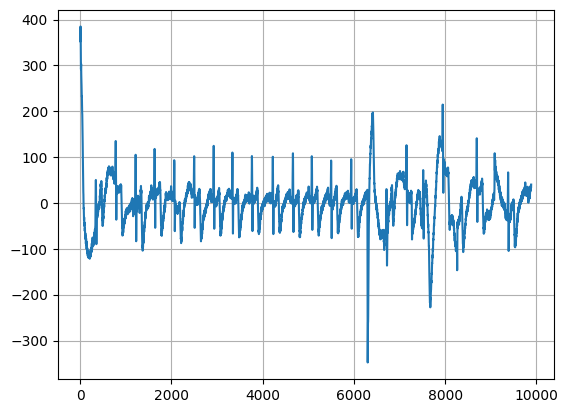

In [4]:
plt.plot(myecg)
plt.grid('on')
plt.show()

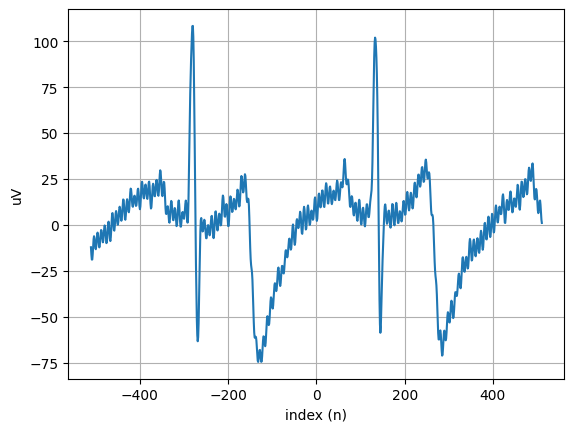

In [5]:
x = myecg[t0-511:t0+512]
n = np.arange(len(x))-511
n0 = int(len(n)/2)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.ylabel('uV')
plt.grid('on')

plt.show()

## System 1: Identity/Amplication/Attenuation
- h[n] = K δ[n]

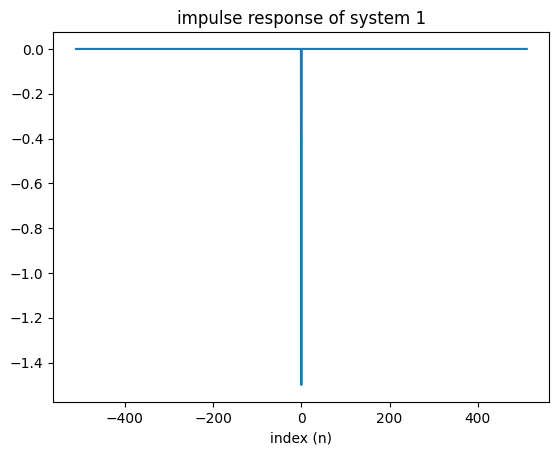

In [6]:
K = -1.5
h = np.zeros(x.shape)
h[n0] = K
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 1')
plt.show()

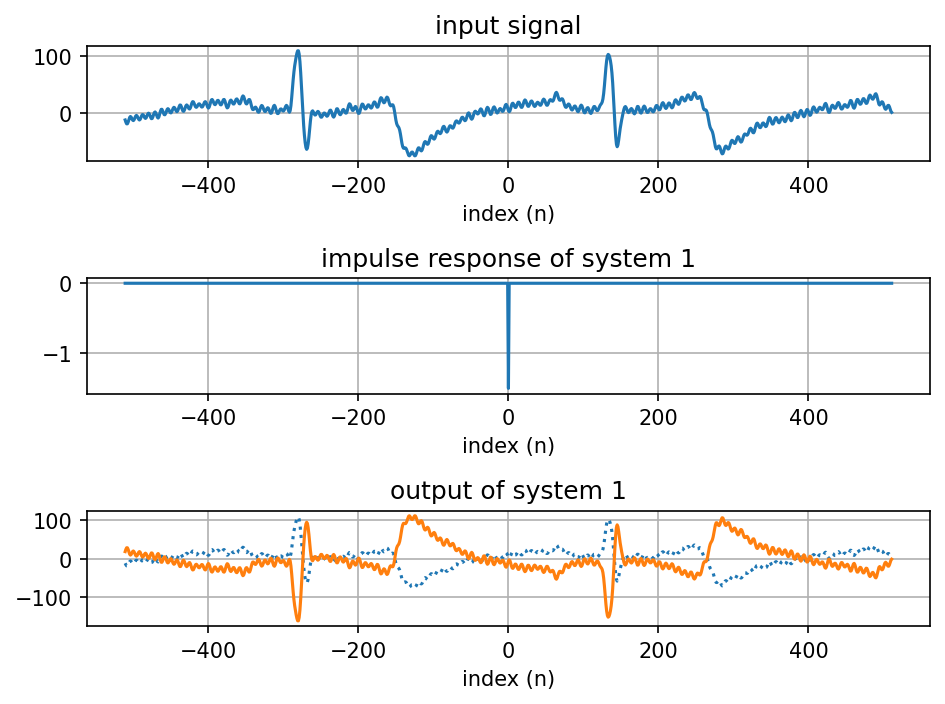

In [7]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 1')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 1')
plt.grid('on')

plt.tight_layout()
plt.show()

## System 2: Shift
- h[n] = δ[n-200]

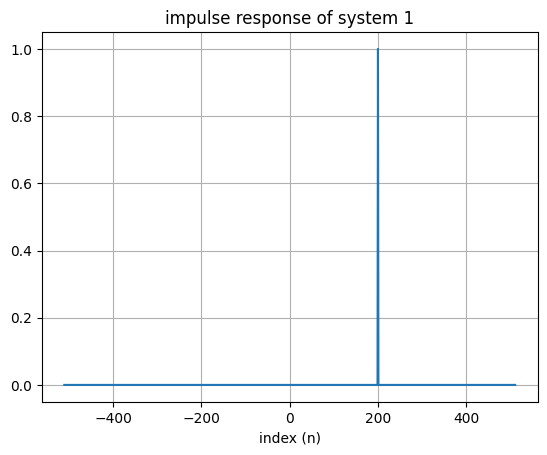

In [8]:
h = np.zeros(x.shape)
h[n0 + 200] = 1
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 1')
plt.grid('on')

plt.show()

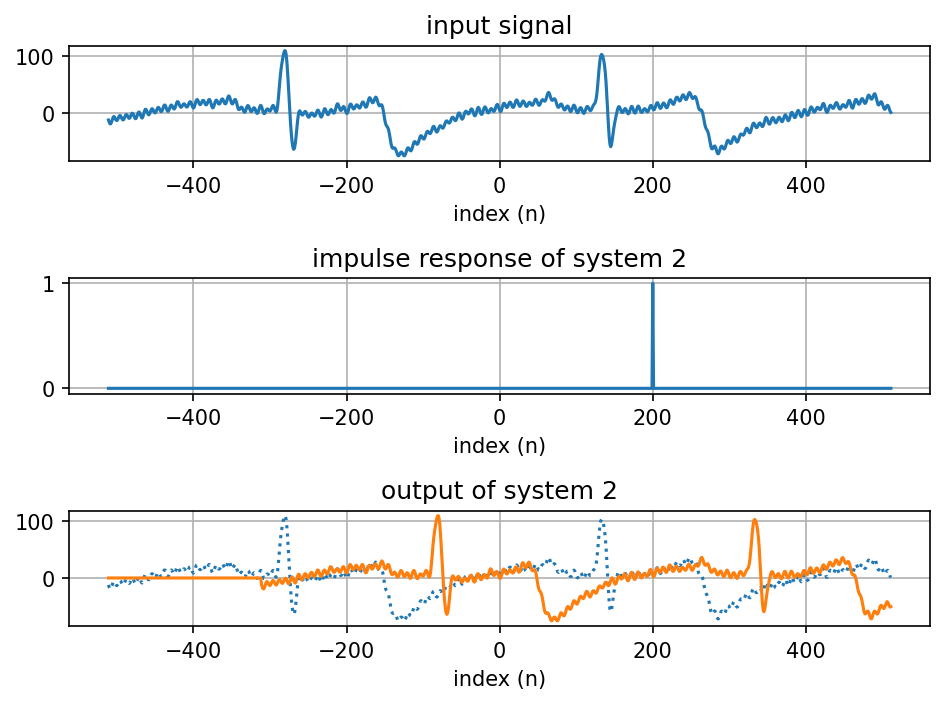

In [9]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 2')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 2')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 3: Echo
- h[n] = δ[n] + 2δ[n-200]

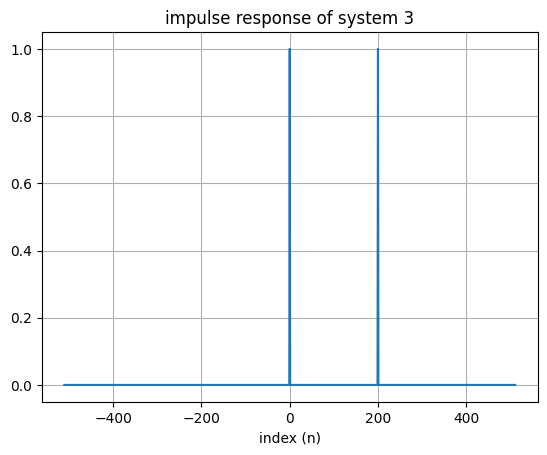

In [10]:
h = np.zeros(x.shape)
h[n0] = 1
h[n0 + 200] = 1
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 3')
plt.grid('on')

plt.show()

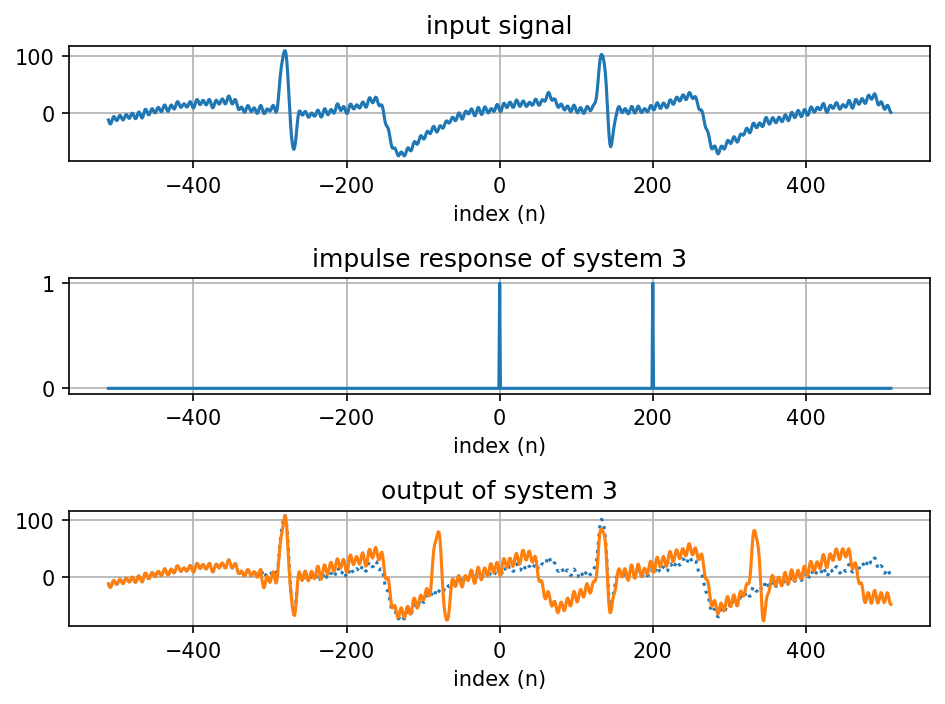

In [11]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 3')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 3')
plt.grid('on')

plt.tight_layout()
plt.show()

## System 4: running sum
- h[n] = u[n]

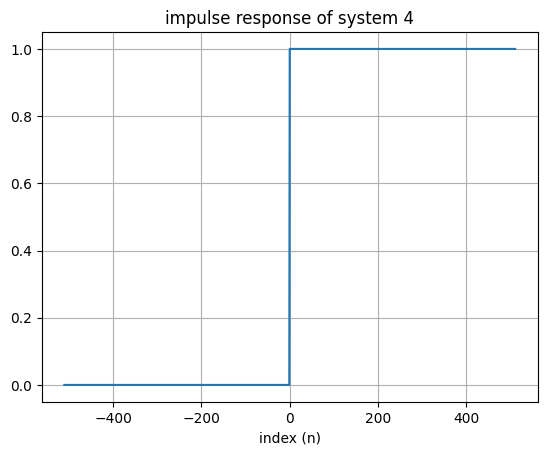

In [12]:
h = np.zeros(x.shape)
h[n0:] = 1
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 4')
plt.grid('on')
plt.show()

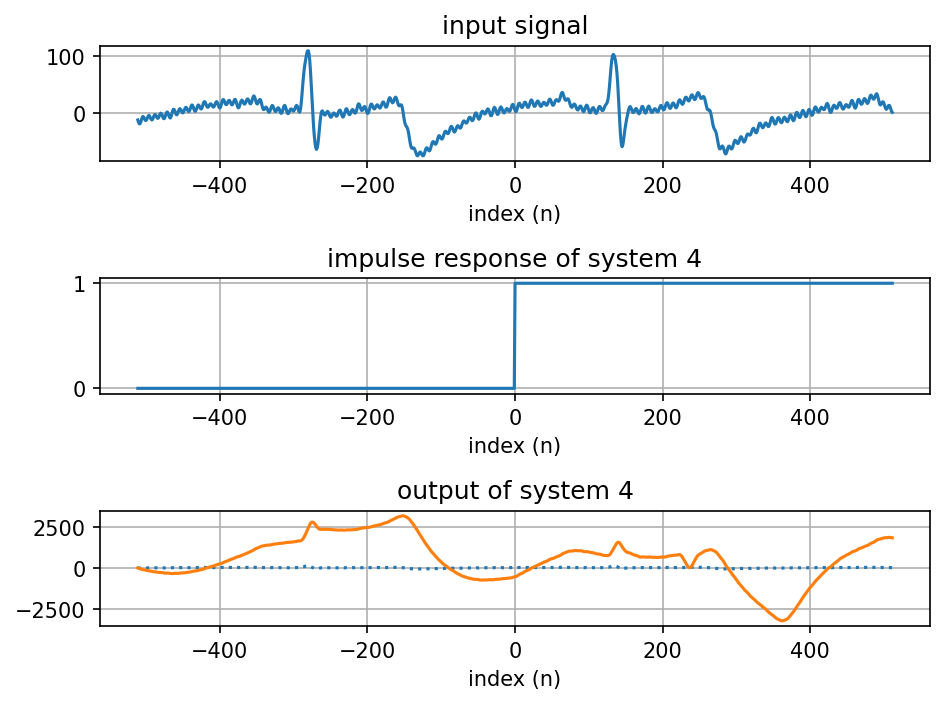

In [13]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 4')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 4')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 5: First derivative (first difference)
- h[n] = δ[n] - δ[n-1]

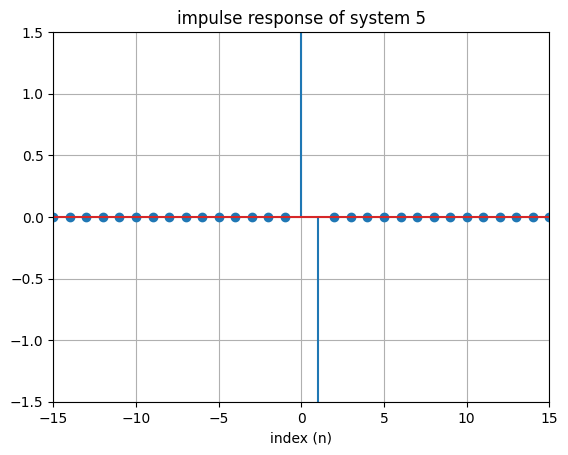

In [14]:
h = np.zeros(x.shape)
h[n0] = 5
h[n0 + 1] = -5
plt.stem(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 5')
plt.grid('on')
plt.axis([-15,15,-1.5,1.5])
plt.show()

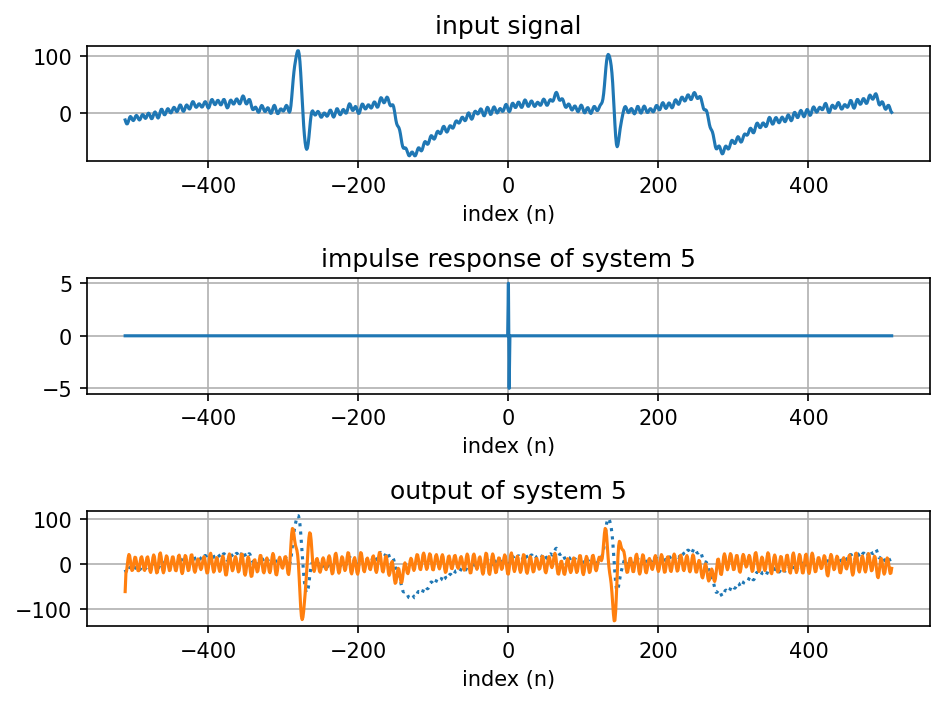

In [15]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 5')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 5')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 6: moving average
- h[n] is a square pulse

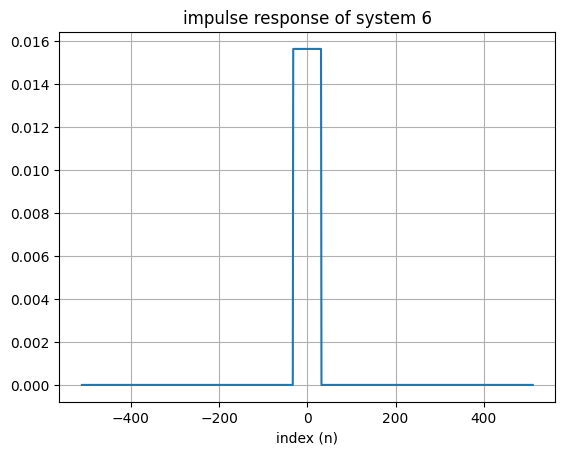

In [16]:
h = np.zeros(x.shape)
h[n0-32:n0+32] = 1/64
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 6')
plt.grid('on')
plt.show()

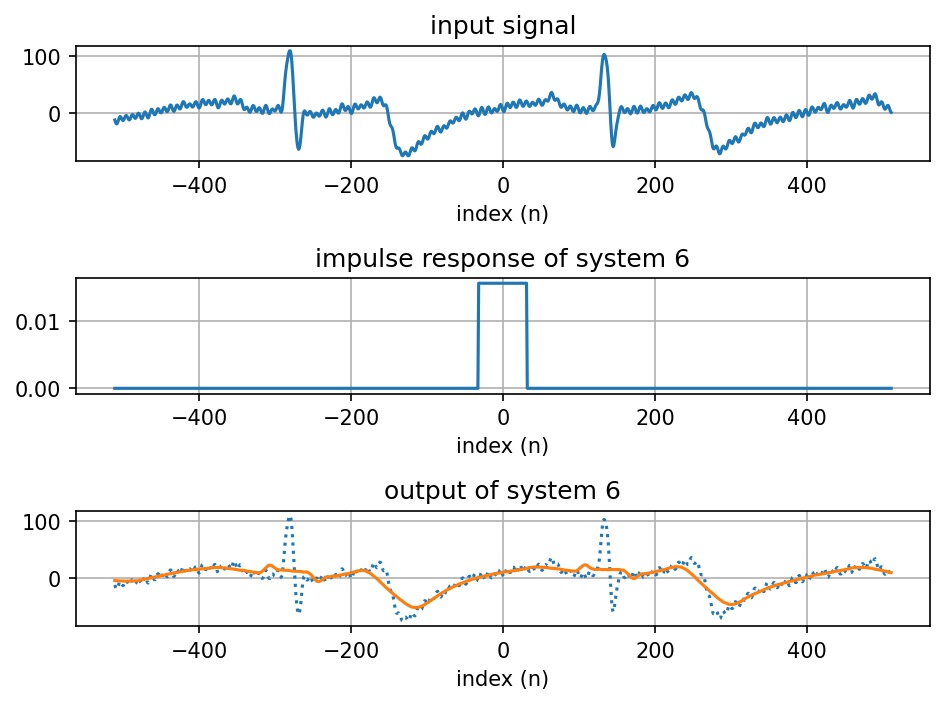

In [17]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 6')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 6')
plt.grid('on')


plt.tight_layout()
plt.show()

## System 6.5: denoising using moving average


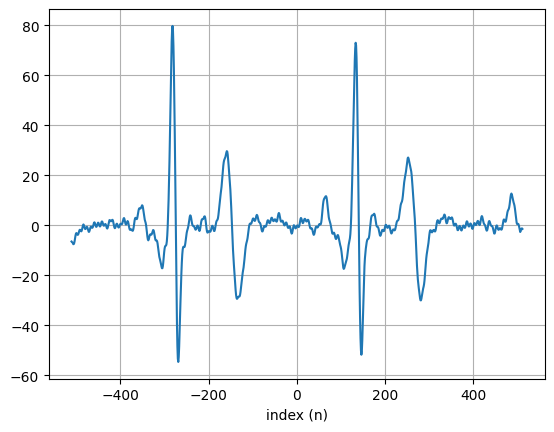

In [18]:
h = np.zeros(x.shape)
h[n0-32:n0+32] = 1/64
y1 = np.convolve(x,h,'same')

h2 = np.zeros(x.shape)
h2[n0-5:n0+5] = 1/10
y2 = np.convolve(x-y1,h2,'same')

#plt.plot(n,x,':')
plt.plot(n,y2)
plt.xlabel('index (n)')
plt.grid('on')
plt.show()

## System 7
- h[n] is a delayed sinc

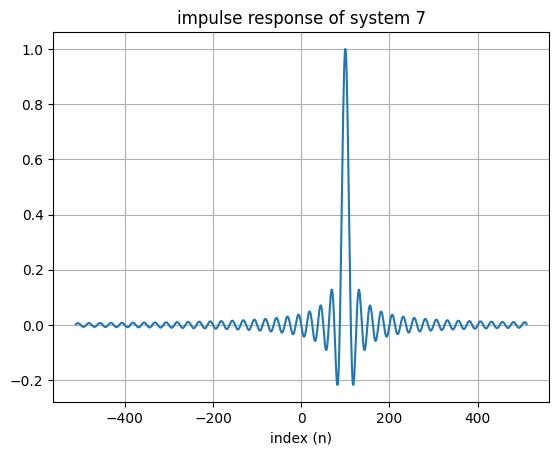

In [19]:
h = np.sinc(.08*(n-100))
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 7')
plt.grid('on')
plt.show()

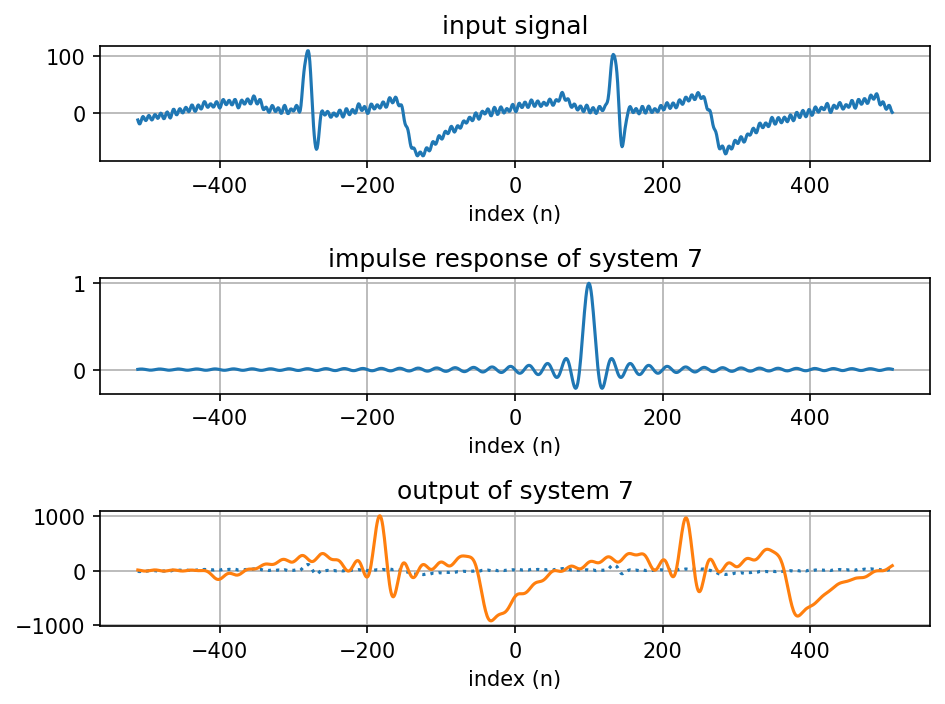

In [20]:
y = np.convolve(x,h,'same')

plt.figure(dpi=150)

plt.subplot(311)
plt.plot(n,x)
plt.xlabel('index (n)')
plt.title('input signal')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h)
plt.xlabel('index (n)')
plt.title('impulse response of system 7')
plt.grid('on')


plt.subplot(313)
plt.plot(n,x,':')
plt.plot(n,y)
plt.xlabel('index (n)')
plt.title('output of system 7')
plt.grid('on')


plt.tight_layout()
plt.show()